In [ ]:
# Importando as bibliotecas que irei utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.express as px
import matplotlib.ticker as mtick

In [ ]:
#Importando a base de dados
df = pd.read_csv("/content/arrecadacao-estado.csv", encoding="ISO-8859-1", sep=";")

In [ ]:
#Analisando algumas informações iniciais sobre a base
df.head(7)

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,...,REFIS,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS
0,2000,Janeiro,AC,231,0,292096,0,0,167,1558,...,NaN,NaN,NaN,NaN,20911,NaN,NaN,NaN,NaN,NaN
1,2000,Janeiro,AL,475088,33873,1329338,812470,0,141735,3676847,...,NaN,NaN,NaN,NaN,127189,NaN,NaN,NaN,NaN,NaN
2,2000,Janeiro,AM,11679405,0,1507146,1791471,27796,4414483,1800346,...,NaN,NaN,NaN,NaN,187988,NaN,NaN,NaN,NaN,NaN
3,2000,Janeiro,AP,24267,0,424862,1419,321,22333,12165,...,NaN,NaN,NaN,NaN,10769,NaN,NaN,NaN,NaN,NaN
4,2000,Janeiro,BA,10476457,13,5542123,11533707,0,7496476,23743858,...,NaN,NaN,NaN,NaN,536498,NaN,NaN,NaN,NaN,NaN
5,2000,Janeiro,CE,5576921,0,4535653,3148254,0,1734529,3716458,...,NaN,NaN,NaN,NaN,143952,NaN,NaN,NaN,NaN,NaN
6,2000,Janeiro,DF,2254341,43,3197500,2777942,0,2079272,2433339,...,NaN,NaN,NaN,NaN,33937318,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Analisando algumas informações com o .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8262 entries, 0 to 8261
Data columns (total 45 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ano                                                           8262 non-null   int64  
 1   Mês                                                           8262 non-null   object 
 2   UF                                                            8262 non-null   object 
 3   IMPOSTO SOBRE IMPORTAÇÃO                                      8262 non-null   object 
 4   IMPOSTO SOBRE EXPORTAÇÃO                                      8262 non-null   object 
 5   IPI - FUMO                                                    8262 non-null   object 
 6   IPI - BEBIDAS                                                 8262 non-null   object 
 7   IPI - AUTOMÓVEIS                                              8262 no

#### 📊 Análise: Informações gerais e colunas com valores nulos

A base tem 8262 linhas e foi possível identificar que algumas colunas apresentam nulos ou itens faltantes. Para algumas dessas colunas já é possível capturar alguns insights, por exemplo, a quantidade de nulos/ausentes nas colunas relativas a CPMF, que foi um imposto que vigorou por um período de 10, mas que não é mais vingente.
Ainda, boa parte das colunas está com tipo de dado "object", então será necessário um tratamento quanto a isso.


In [ ]:
#Consultando todas as colunas para usar na fórmula abaixo
df.columns

Index(['Ano', 'Mês', 'UF', 'IMPOSTO SOBRE IMPORTAÇÃO',
       'IMPOSTO SOBRE EXPORTAÇÃO', 'IPI - FUMO', 'IPI - BEBIDAS',
       'IPI - AUTOMÓVEIS', 'IPI - VINCULADO À IMPORTACAO', 'IPI - OUTROS',
       'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS', 'IRPJ - DEMAIS EMPRESAS',
       'IRRF - RENDIMENTOS DO TRABALHO', 'IRRF - RENDIMENTOS DO CAPITAL',
       'IRRF - REMESSAS P/ EXTERIOR', 'IRRF - OUTROS RENDIMENTOS',
       'IMPOSTO S/ OPERAÇÕES FINANCEIRAS', 'IMPOSTO TERRITORIAL RURAL',
       'IMPOSTO PROVIS.S/ MOVIMENT. FINANC. - IPMF', 'CPMF', 'COFINS',
       'COFINS - FINANCEIRAS', 'COFINS - DEMAIS',
       'CONTRIBUIÇÃO PARA O PIS/PASEP',
       'CONTRIBUIÇÃO PARA O PIS/PASEP - FINANCEIRAS',
       'CONTRIBUIÇÃO PARA O PIS/PASEP - DEMAIS', 'CSLL', 'CSLL - FINANCEIRAS',
       'CSLL - DEMAIS', 'CIDE-COMBUSTÍVEIS (parc. não dedutível)',
       'CIDE-COMBUSTÍVEIS', 'CONTRIBUIÇÃO PLANO SEG. SOC. SERVIDORES',
       'CPSSS - Contrib. p/ o Plano de Segurid. Social Serv. Público',
       'CONTRIB

In [ ]:
# Mudando o tipo de dado das colunas Object para Numérico
colunas_numericas = ['IMPOSTO SOBRE IMPORTAÇÃO', 'IMPOSTO SOBRE EXPORTAÇÃO', 'IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS', 'IPI - VINCULADO À IMPORTACAO', 'IPI - OUTROS', 'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS', 'IRPJ - DEMAIS EMPRESAS', 'IRRF - RENDIMENTOS DO TRABALHO', 'IRRF - RENDIMENTOS DO CAPITAL', 'IRRF - REMESSAS P/ EXTERIOR', 'IRRF - OUTROS RENDIMENTOS', 'IMPOSTO S/ OPERAÇÕES FINANCEIRAS', 'IMPOSTO TERRITORIAL RURAL', 'CPMF', 'COFINS', 'COFINS - FINANCEIRAS', 'COFINS - DEMAIS', 'CONTRIBUIÇÃO PARA O PIS/PASEP', 'CONTRIBUIÇÃO PARA O PIS/PASEP - FINANCEIRAS', 'CONTRIBUIÇÃO PARA O PIS/PASEP - DEMAIS', 'CSLL', 'CSLL - FINANCEIRAS', 'CSLL - DEMAIS', 'CIDE-COMBUSTÍVEIS (parc. não dedutível)', 'CIDE-COMBUSTÍVEIS', 'CONTRIBUIÇÃO PLANO SEG. SOC. SERVIDORES', 'CPSSS - Contrib. p/ o Plano de Segurid. Social Serv. Público', 'CONTRIBUICÕES PARA FUNDAF', 'OUTRAS RECEITAS ADMINISTRADAS', 'DEMAIS RECEITAS', 'RECEITA PREVIDENCIÁRIA', 'RECEITA PREVIDENCIÁRIA - PRÓPRIA', 'RECEITA PREVIDENCIÁRIA - DEMAIS', 'ADMINISTRADAS POR OUTROS ÓRGÃOS']
for col in colunas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#Conferindo se realmente mudou
df.dtypes


,0
Ano,int64
Mês,object
UF,object
IMPOSTO SOBRE IMPORTAÇÃO,float64
IMPOSTO SOBRE EXPORTAÇÃO,float64
IPI - FUMO,float64
IPI - BEBIDAS,float64
IPI - AUTOMÓVEIS,float64
IPI - VINCULADO À IMPORTACAO,float64
IPI - OUTROS,float64


In [ ]:
# Visualizando algumas métricas estatísticas com o .decribe()
df.describe()

,Ano,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,IRPF,IRPJ - ENTIDADES FINANCEIRAS,...,REFIS,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS
count,8262.000000,3.095000e+03,3.309000e+03,5.679000e+03,3.261000e+03,4.911000e+03,3.260000e+03,2.943000e+03,3.005000e+03,3.430000e+03,...,3.240000e+02,3.240000e+02,2.700000e+02,3.780000e+02,2.929000e+03,1.253000e+03,1.063000e+03,8.180000e+02,6.240000e+02,7.890000e+02
mean,2012.254902,1.459699e+08,1.211039e+06,5.675561e+06,6.284960e+06,6.877062e+06,2.858547e+07,7.495188e+07,1.087845e+08,7.067185e+07,...,2.163363e+06,8.472560e+06,1.295935e+07,9.749743e+06,7.285370e+07,1.017484e+08,3.398229e+09,1.502373e+09,1.747092e+08,1.081048e+09
std,7.364490,4.184738e+08,3.484826e+07,3.265806e+07,1.292762e+07,2.597696e+07,8.613582e+07,2.257245e+08,4.492205e+08,3.549474e+08,...,3.904852e+06,1.657378e+07,3.508999e+07,1.876911e+07,6.882899e+08,4.460042e+08,4.414372e+09,2.659344e+09,3.794346e+08,2.917502e+09
min,2000.000000,-5.915950e+05,-3.379762e+06,-1.663267e+07,-1.079723e+07,-6.835020e+05,0.000000e+00,-3.264033e+06,6.771900e+04,-3.140682e+06,...,-1.797889e+06,1.360000e+05,9.309000e+03,1.161950e+05,-1.991267e+10,-1.974837e+07,3.446879e+07,2.256750e+07,1.270067e+06,-9.683443e+06
25%,2006.000000,2.085255e+05,0.000000e+00,0.000000e+00,3.342000e+03,0.000000e+00,8.558750e+03,9.686855e+05,2.039933e+06,3.402500e+02,...,2.972922e+05,1.179268e+06,5.177198e+05,1.236024e+06,3.009150e+05,1.229139e+06,1.195143e+09,1.649453e+08,8.936157e+06,3.982023e+06
50%,2012.000000,4.682739e+06,1.830000e+02,0.000000e+00,2.085289e+06,0.000000e+00,8.659740e+05,3.265335e+06,7.317510e+06,4.524050e+04,...,7.620455e+05,2.561976e+06,2.529214e+06,2.937894e+06,1.717363e+06,3.459607e+06,2.084680e+09,4.924577e+08,3.113422e+07,1.145160e+07
75%,2019.000000,5.305089e+07,1.202500e+04,1.355911e+06,6.682511e+06,2.308500e+03,1.750860e+07,4.055972e+07,2.866744e+07,4.479440e+06,...,2.336568e+06,6.589126e+06,8.767503e+06,8.698714e+06,1.230744e+07,1.012308e+07,3.338404e+09,1.626420e+09,1.253241e+08,1.238434e+08
max,2025.000000,2.907220e+09,1.390368e+09,8.944776e+08,1.339966e+08,3.420379e+08,1.152147e+09,1.666053e+09,1.142279e+10,7.729619e+09,...,2.458967e+07,8.532303e+07,2.138863e+08,1.032222e+08,2.289754e+10,4.763001e+09,3.279567e+10,1.949341e+10,2.385163e+09,2.247643e+10


In [ ]:
# Desativando a notação científica na exibição pois estava muito ruim de interpretar
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Visualizando algumas métricas estatísticas com o .decribe()
df.describe()

,Ano,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,IRPF,IRPJ - ENTIDADES FINANCEIRAS,...,REFIS,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS
count,8262.00,3095.00,3309.00,5679.00,3261.00,4911.00,3260.00,2943.00,3005.00,3430.00,...,324.00,324.00,270.00,378.00,2929.00,1253.00,1063.00,818.00,624.00,789.00
mean,2012.25,145969896.34,1211039.49,5675561.41,6284960.45,6877062.04,28585473.41,74951876.35,108784457.48,70671850.88,...,2163362.53,8472559.98,12959346.55,9749743.00,72853699.41,101748384.41,3398228898.77,1502373065.79,174709240.28,1081048245.49
std,7.36,418473815.11,34848262.59,32658057.94,12927621.69,25976963.31,86135821.87,225724455.42,449220467.99,354947384.52,...,3904852.41,16573775.32,35089988.50,18769113.27,688289851.78,446004169.07,4414372020.32,2659343944.45,379434585.01,2917502491.76
min,2000.00,-591595.00,-3379762.00,-16632674.00,-10797231.00,-683502.00,0.00,-3264033.00,67719.00,-3140682.00,...,-1797889.00,136000.00,9309.00,116195.00,-19912674543.00,-19748374.00,34468789.00,22567496.00,1270067.00,-9683443.00
25%,2006.00,208525.50,0.00,0.00,3342.00,0.00,8558.75,968685.50,2039933.00,340.25,...,297292.25,1179267.50,517719.75,1236024.00,300915.00,1229139.00,1195142928.00,164945304.75,8936157.25,3982023.00
50%,2012.00,4682739.00,183.00,0.00,2085289.00,0.00,865974.00,3265335.00,7317510.00,45240.50,...,762045.50,2561975.50,2529213.50,2937893.50,1717363.00,3459607.00,2084680201.00,492457732.00,31134222.00,11451599.00
75%,2019.00,53050887.50,12025.00,1355911.00,6682511.00,2308.50,17508599.50,40559723.50,28667445.00,4479440.25,...,2336568.50,6589125.50,8767503.00,8698713.75,12307437.00,10123085.00,3338404138.00,1626420369.75,125324103.25,123843390.00
max,2025.00,2907219576.00,1390368256.00,894477627.00,133996570.00,342037857.00,1152146874.00,1666052600.00,11422788602.00,7729618874.00,...,24589673.00,85323027.00,213886298.00,103222157.00,22897541306.00,4763000602.00,32795673233.00,19493414569.00,2385163259.00,22476429345.00


#### 📊 Análise: Valores negativos na arrecadação

A base tem dados referentes a arrecadação de impostos desde o ano 2000 até 2025. Em algumas colunas o valor de "min", que é o menor valor localizado dentro da coluna, está negativo. Esse ponto necessita de uma investigação melhor, uma vez que a tabela é sobre a arrecadação de diferentes tipos de impostos e é estranho ele ser negativo. Comumente na área de finanças e contabilidade, o imposto negativo pode representar crédito de impostos, mas nesse caso essa linha não parece fazer tanto sentido.

  

In [ ]:
# Adicionando uma nova coluna somando as colunas
df['Total_Impostos'] = df[['IMPOSTO SOBRE IMPORTAÇÃO', 'IMPOSTO SOBRE EXPORTAÇÃO', 'IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS', 'IPI - VINCULADO À IMPORTACAO', 'IPI - OUTROS', 'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS', 'IRPJ - DEMAIS EMPRESAS', 'IRRF - RENDIMENTOS DO TRABALHO', 'IRRF - RENDIMENTOS DO CAPITAL', 'IRRF - REMESSAS P/ EXTERIOR', 'IRRF - OUTROS RENDIMENTOS', 'IMPOSTO S/ OPERAÇÕES FINANCEIRAS', 'IMPOSTO TERRITORIAL RURAL', 'IMPOSTO PROVIS.S/ MOVIMENT. FINANC. - IPMF', 'CPMF', 'COFINS', 'COFINS - FINANCEIRAS', 'COFINS - DEMAIS', 'CONTRIBUIÇÃO PARA O PIS/PASEP', 'CONTRIBUIÇÃO PARA O PIS/PASEP - FINANCEIRAS', 'CONTRIBUIÇÃO PARA O PIS/PASEP - DEMAIS', 'CSLL', 'CSLL - FINANCEIRAS', 'CSLL - DEMAIS', 'CIDE-COMBUSTÍVEIS (parc. não dedutível)', 'CIDE-COMBUSTÍVEIS', 'CONTRIBUIÇÃO PLANO SEG. SOC. SERVIDORES', 'CPSSS - Contrib. p/ o Plano de Segurid. Social Serv. Público', 'CONTRIBUICÕES PARA FUNDAF', 'REFIS', 'PAES', 'RETENÇÃO NA FONTE - LEI 10.833, Art. 30', 'PAGAMENTO UNIFICADO', 'OUTRAS RECEITAS ADMINISTRADAS', 'DEMAIS RECEITAS', 'RECEITA PREVIDENCIÁRIA', 'RECEITA PREVIDENCIÁRIA - PRÓPRIA', 'RECEITA PREVIDENCIÁRIA - DEMAIS', 'ADMINISTRADAS POR OUTROS ÓRGÃOS']
].sum(axis=1)
df.head()

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,...,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS,Total_Impostos
0,2000,Janeiro,AC,231.00,0.00,292096.00,0.00,0.00,167.00,1558.00,...,NaN,NaN,NaN,20911.00,NaN,NaN,NaN,NaN,NaN,6166320.00
1,2000,Janeiro,AL,475088.00,33873.00,1329338.00,812470.00,0.00,141735.00,3676847.00,...,NaN,NaN,NaN,127189.00,NaN,NaN,NaN,NaN,NaN,34726149.00
2,2000,Janeiro,AM,11679405.00,0.00,1507146.00,1791471.00,27796.00,4414483.00,1800346.00,...,NaN,NaN,NaN,187988.00,NaN,NaN,NaN,NaN,NaN,117560950.00
3,2000,Janeiro,AP,24267.00,0.00,424862.00,1419.00,321.00,22333.00,12165.00,...,NaN,NaN,NaN,10769.00,NaN,NaN,NaN,NaN,NaN,9593108.00
4,2000,Janeiro,BA,10476457.00,13.00,5542123.00,11533707.00,0.00,7496476.00,23743858.00,...,NaN,NaN,NaN,536498.00,NaN,NaN,NaN,NaN,NaN,285820197.00


In [ ]:
#Filtrando valores negativos na base pela coluna Total_Impostos
df_neg = df[df['Total_Impostos'] < 0].reset_index()
df_neg

,index,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,...,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS,Total_Impostos
0,3113,2009,Agosto,GO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-19748374.00,NaN,NaN,NaN,NaN,-19748374.00
1,3320,2010,Março,TO,NaN,NaN,0.00,NaN,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6005.00
2,3416,2010,Julho,PB,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-825.00
3,3532,2010,Novembro,RR,NaN,-1.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00
4,3664,2011,Abril,RN,NaN,-8.00,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.00
5,4006,2012,Maio,MG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15200.00
6,4069,2012,Julho,RN,NaN,-4.00,0.00,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.00
7,5897,2018,Março,MS,NaN,-41.00,0.00,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.00
8,6221,2019,Março,MS,NaN,-58.00,0.00,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-58.00
9,7310,2022,Julho,RO,NaN,-80.00,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.00


In [ ]:
## Filtrando as linhas com número negativo em qualquer coluna
df_numeric = df.select_dtypes(include='number')
df_neg1 = df[df_numeric.lt(0).any(axis=1)].reset_index()
df_neg1

,index,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,...,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS,Total_Impostos
0,1317,2004,Janeiro,RO,32967.00,-29.00,682886.00,3706.00,389.00,21007.00,...,664934.00,NaN,NaN,164860.00,5379573.00,NaN,NaN,NaN,NaN,43203237.00
1,1326,2004,Fevereiro,AM,12775957.00,-17.00,1934098.00,2763039.00,0.00,2077965.00,...,2617255.00,NaN,NaN,5406609.00,5044563.00,NaN,NaN,NaN,NaN,206739457.00
2,1339,2004,Fevereiro,PE,9108922.00,-87.00,7251863.00,9722331.00,0.00,4576487.00,...,4294153.00,NaN,NaN,925921.00,11816643.00,NaN,NaN,NaN,NaN,284867724.00
3,1342,2004,Fevereiro,RN,542601.00,0.00,2551505.00,1254153.00,0.00,241604.00,...,1351514.00,NaN,NaN,143673.00,7977309.00,NaN,NaN,NaN,NaN,45402142.00
4,1344,2004,Fevereiro,RO,18965.00,0.00,852586.00,2804.00,578.00,7034.00,...,532006.00,NaN,NaN,108380.00,6739864.00,NaN,NaN,NaN,NaN,42999803.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,7326,2022,Agosto,MA,NaN,-3.00,0.00,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.00
412,7797,2024,Janeiro,RO,NaN,-91.00,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107447769.00
413,8134,2025,Fevereiro,ES,NaN,NaN,0.00,NaN,NaN,236719056.00,...,NaN,NaN,NaN,7335868897.00,NaN,NaN,NaN,NaN,NaN,2166820599.00
414,8151,2025,Fevereiro,SP,2429805760.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-2133361204.00,NaN,17046674660.00,NaN,NaN,NaN,72254694935.00


📌 Valores negativos em bases financeiras, comumente podem representar ajustes contábeis, compensações tributárias ou correções retroativas. No entanto, quando falamos da base de arrecadação divulgada pela Receita Federal - composta por dados públicos onde os valores deveriam representar entradas de receitas tributárias, ou seja, recursos que efetivamente entraram nos cofres públicos - nesse contexto, a presença de valores negativos soa, no mínimo, incomum


In [ ]:
df.describe()

,Ano,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,IRPF,IRPJ - ENTIDADES FINANCEIRAS,...,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS,Total_Impostos
count,8262.00,3095.00,3309.00,5679.00,3261.00,4911.00,3260.00,2943.00,3005.00,3430.00,...,324.00,270.00,378.00,2929.00,1253.00,1063.00,818.00,624.00,789.00,8262.00
mean,2012.25,145969896.34,1211039.49,5675561.41,6284960.45,6877062.04,28585473.41,74951876.35,108784457.48,70671850.88,...,8472559.98,12959346.55,9749743.00,72853699.41,101748384.41,3398228898.77,1502373065.79,174709240.28,1081048245.49,2295129872.19
std,7.36,418473815.11,34848262.59,32658057.94,12927621.69,25976963.31,86135821.87,225724455.42,449220467.99,354947384.52,...,16573775.32,35089988.50,18769113.27,688289851.78,446004169.07,4414372020.32,2659343944.45,379434585.01,2917502491.76,8117336806.99
min,2000.00,-591595.00,-3379762.00,-16632674.00,-10797231.00,-683502.00,0.00,-3264033.00,67719.00,-3140682.00,...,136000.00,9309.00,116195.00,-19912674543.00,-19748374.00,34468789.00,22567496.00,1270067.00,-9683443.00,-19748374.00
25%,2006.00,208525.50,0.00,0.00,3342.00,0.00,8558.75,968685.50,2039933.00,340.25,...,1179267.50,517719.75,1236024.00,300915.00,1229139.00,1195142928.00,164945304.75,8936157.25,3982023.00,0.00
50%,2012.00,4682739.00,183.00,0.00,2085289.00,0.00,865974.00,3265335.00,7317510.00,45240.50,...,2561975.50,2529213.50,2937893.50,1717363.00,3459607.00,2084680201.00,492457732.00,31134222.00,11451599.00,47883635.00
75%,2019.00,53050887.50,12025.00,1355911.00,6682511.00,2308.50,17508599.50,40559723.50,28667445.00,4479440.25,...,6589125.50,8767503.00,8698713.75,12307437.00,10123085.00,3338404138.00,1626420369.75,125324103.25,123843390.00,792990197.50
max,2025.00,2907219576.00,1390368256.00,894477627.00,133996570.00,342037857.00,1152146874.00,1666052600.00,11422788602.00,7729618874.00,...,85323027.00,213886298.00,103222157.00,22897541306.00,4763000602.00,32795673233.00,19493414569.00,2385163259.00,22476429345.00,118655557876.00


#### 📊 Análise: Total de arrecadação

A média do total de Impostos arrecadados durante todo o período foi de 2.295.129.872,19 (Dois bilhões, duzentos e noventa e cinco milhões, cento e vinte e nove mil, oitocentos e setenta e dois reais e dezenove centavos.)

In [ ]:
# Analisando o total geral considerando todos os impostos arrecadados
total_geral = df['Total_Impostos'].sum()
print(f'Total geral de arrecadação: R$ {total_geral:,.2f}')

Total geral de arrecadação: R$ 18,962,363,004,071.77


In [ ]:
#Visualizando o total de impostos por UF
total_UF = df.groupby('UF')['Total_Impostos'].sum().reset_index()
print(total_UF)

    UF   Total_Impostos
0   AC    3322729397.69
1   AL   13216921540.00
2   AM   72138419983.00
3   AP    2929101943.00
4   BA  239388997033.00
5   CE  119023345629.00
6   DF 1640025118606.00
7   ES  121768025156.00
8   GO  115830471618.00
9   MA   26668715256.00
10  MG  995379380766.00
11  MS   21785643130.00
12  MT   43114337803.00
13  PA   49971164508.00
14  PB   23397132984.00
15  PE  131939163389.00
16  PI   13865028931.00
17  PR  704837291126.00
18  RJ 3874920264334.00
19  RN   16840570380.00
20  RO   11156684504.00
21  RR    2441360297.08
22  RS  696372962564.00
23  SC  626714949836.00
24  SE   13749138314.00
25  SP 9373931938462.00
26  TO    7634146582.00


In [ ]:
# Função genérica para formatar os valores, uma vez que estamos tratando com números muito extensos, nas casas de bilhões e trilhões

def formatar_numero(valor):
    if valor >= 1e12:
        return f'{valor/1e12:.1f}T' #Trilhão
    elif valor >= 1e9:
        return f'{valor/1e9:.1f}B' #Bilhão
    elif valor >= 1e6:
        return f'{valor/1e6:.1f}M' #Milhão
    else:
        return str(int(valor))


In [ ]:
# Aplicando a função acima no eixo Y
def formatar_valores(ax):
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _: formatar_numero(x))
    )

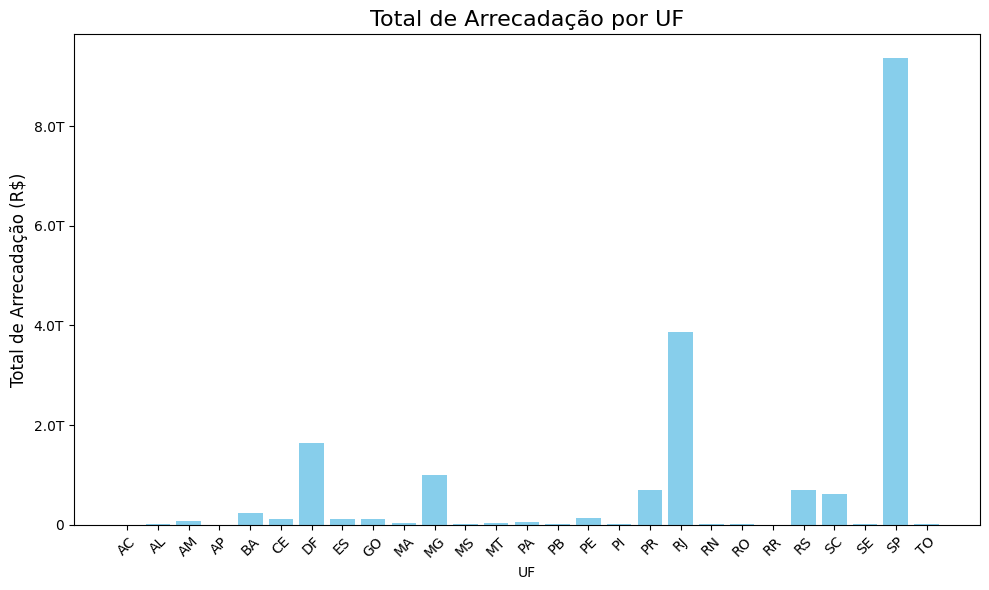

In [ ]:
# Criando um gráfico gráfico de total de arrecadação por UF
plt.figure(figsize=(10, 6))
plt.bar(total_UF['UF'], total_UF['Total_Impostos'], color='skyblue')
plt.title('Total de Arrecadação por UF', fontsize=16)
plt.xlabel('UF')
plt.ylabel('Total de Arrecadação (R$)', fontsize=12)
plt.xticks(rotation=45)
formatar_valores(plt.gca())
plt.tight_layout()
plt.show()


### 📊 Análise: Arrecadação por UF

Quanto a arrecadação por Unidade Federativa (UF), temos São Paulo como o maior arrecadador em disparado, seguido do Rio de Janeiro, Distrito Federal e Minas Gerais. São Paulo já é comumente conhecido como um dos estados mais ricos da federação e junto com Rio de Janeiro e Minas, sempre estão entre pelo menos os 5 maiores em Produto Interno Bruto. Algumas UF aparecem com saldo zero, mas isso não indica nenhuma arrecadação, mas uma arrecadação bem abaixo da unidade de trilhão, que é a unidade considerada no gráfico.

In [ ]:
total_ano_UF = df.groupby(['Ano','UF'])['Total_Impostos'].sum()
print(total_ano_UF)


Ano   UF
2000  AC       74740794.00
      AL      383412682.00
      AM     1796853563.00
      AP      104164176.00
      BA     3516821213.00
                 ...      
2025  RS    34964655575.00
      SC    50193213324.00
      SE      114990403.00
      SP   482963421004.00
      TO              0.00
Name: Total_Impostos, Length: 702, dtype: float64


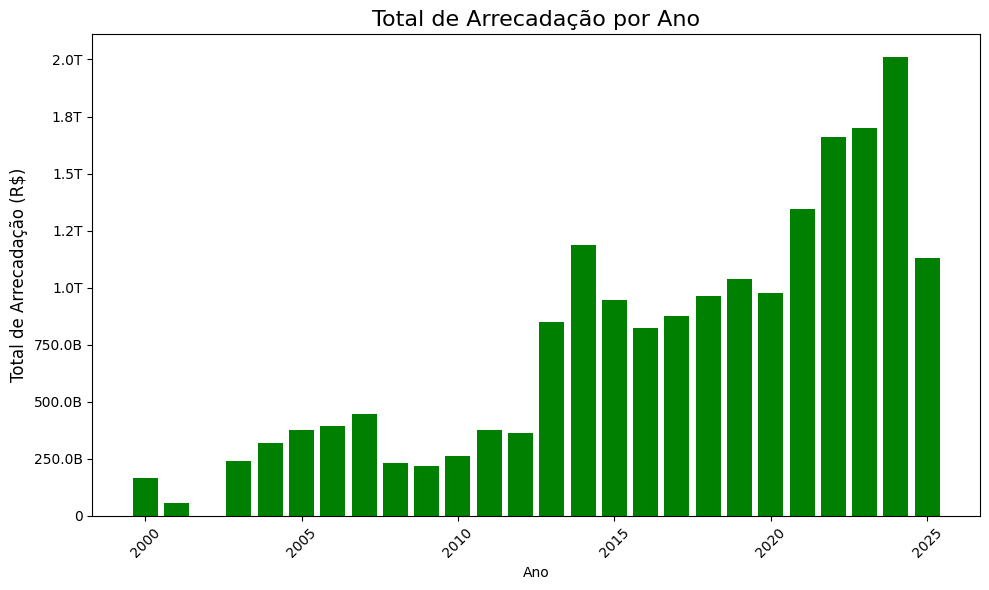

In [ ]:
# Agrupando por Ano
grupo_ano = df.groupby('Ano')['Total_Impostos'].sum().reset_index()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(grupo_ano['Ano'], grupo_ano['Total_Impostos'], color='green')
plt.title('Total de Arrecadação por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Total de Arrecadação (R$)', fontsize=12)
plt.xticks(rotation=45)
formatar_valores(plt.gca())
plt.tight_layout()
plt.show()




#### 📊 Análise: Total de arrecadação por ano

De acordo com o gráfico é possível entender que 2001 foi o ano onde houve menos arrecadação dos impostos federais. O ano com maior arrecadação até agora está sendo 2024. Ainda, é possível notar a ausência total de dados do ano de 2002 na tabela. Isso talvez indique algum erro na extração e compilação dos dados disponibilizados ou ainda, um valor de arrecadação muito abaixo da casa do trilhão.


#### Ano 2002

In [ ]:
#Filtrando o Ano 2002 para ver se tem algum retorno.
df_2002 = df[df['Ano'] == 2002]
df_2002

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,...,PAES,"RETENÇÃO NA FONTE - LEI 10.833, Art. 30",PAGAMENTO UNIFICADO,OUTRAS RECEITAS ADMINISTRADAS,DEMAIS RECEITAS,RECEITA PREVIDENCIÁRIA,RECEITA PREVIDENCIÁRIA - PRÓPRIA,RECEITA PREVIDENCIÁRIA - DEMAIS,ADMINISTRADAS POR OUTROS ÓRGÃOS,Total_Impostos
648,2002,Janeiro,AC,119.00,0.00,NaN,110.00,0.00,10.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2418.00
649,2002,Janeiro,AL,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,790.00
650,2002,Janeiro,AP,966.00,0.00,NaN,NaN,248.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1421.00
651,2002,Janeiro,AM,NaN,0.00,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
652,2002,Janeiro,BA,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2002,Dezembro,RR,NaN,0.00,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.00
968,2002,Dezembro,SC,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
969,2002,Dezembro,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
970,2002,Dezembro,SE,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [ ]:
total_2002 = df[df["Ano"] == 2002]["Total_Impostos"].sum()
print(total_2002)


60274.0


📌 O filtro pelo ano de 2002 teve um retorno de 324 linhas, com um total de 60.274,00 reais de arrecadação apenas. Isso explica não ter aparecido no gráfico acima, uma vez que ele estava em trilhões de reais.

### 🔍 Visualizações Gerais

In [ ]:
# Removendo as colunas de Ano, Mês e UF
colunas_impostos = df.drop(columns=['Ano', 'Mês', 'UF', 'Total_Impostos']).columns

# Somando os valores por tipo de imposto
totais_por_imposto = df[colunas_impostos].sum().sort_values(ascending=False)

# Transformando em DataFrame para visualização
totais_df = totais_por_imposto.reset_index()
totais_df.columns = ['Tipo_Imposto', 'Total_Arrecadado']

print(totais_df)


                                         Tipo_Imposto  Total_Arrecadado
0                              RECEITA PREVIDENCIÁRIA  3612317319395.00
1                                     COFINS - DEMAIS  3178039142905.00
2                              IRPJ - DEMAIS EMPRESAS  2171093755042.00
3                      IRRF - RENDIMENTOS DO TRABALHO  1724717090120.00
4                    RECEITA PREVIDENCIÁRIA - PRÓPRIA  1228941167820.00
5                                       CSLL - DEMAIS   921158410257.00
6                       IRRF - RENDIMENTOS DO CAPITAL   909488776135.00
7                     ADMINISTRADAS POR OUTROS ÓRGÃOS   852947065687.67
8              CONTRIBUIÇÃO PARA O PIS/PASEP - DEMAIS   614408712913.00
9                    IMPOSTO S/ OPERAÇÕES FINANCEIRAS   501072456889.00
10                           IMPOSTO SOBRE IMPORTAÇÃO   451776829182.00
11                        IRRF - REMESSAS P/ EXTERIOR   391819102411.00
12                                               IRPF   32689729

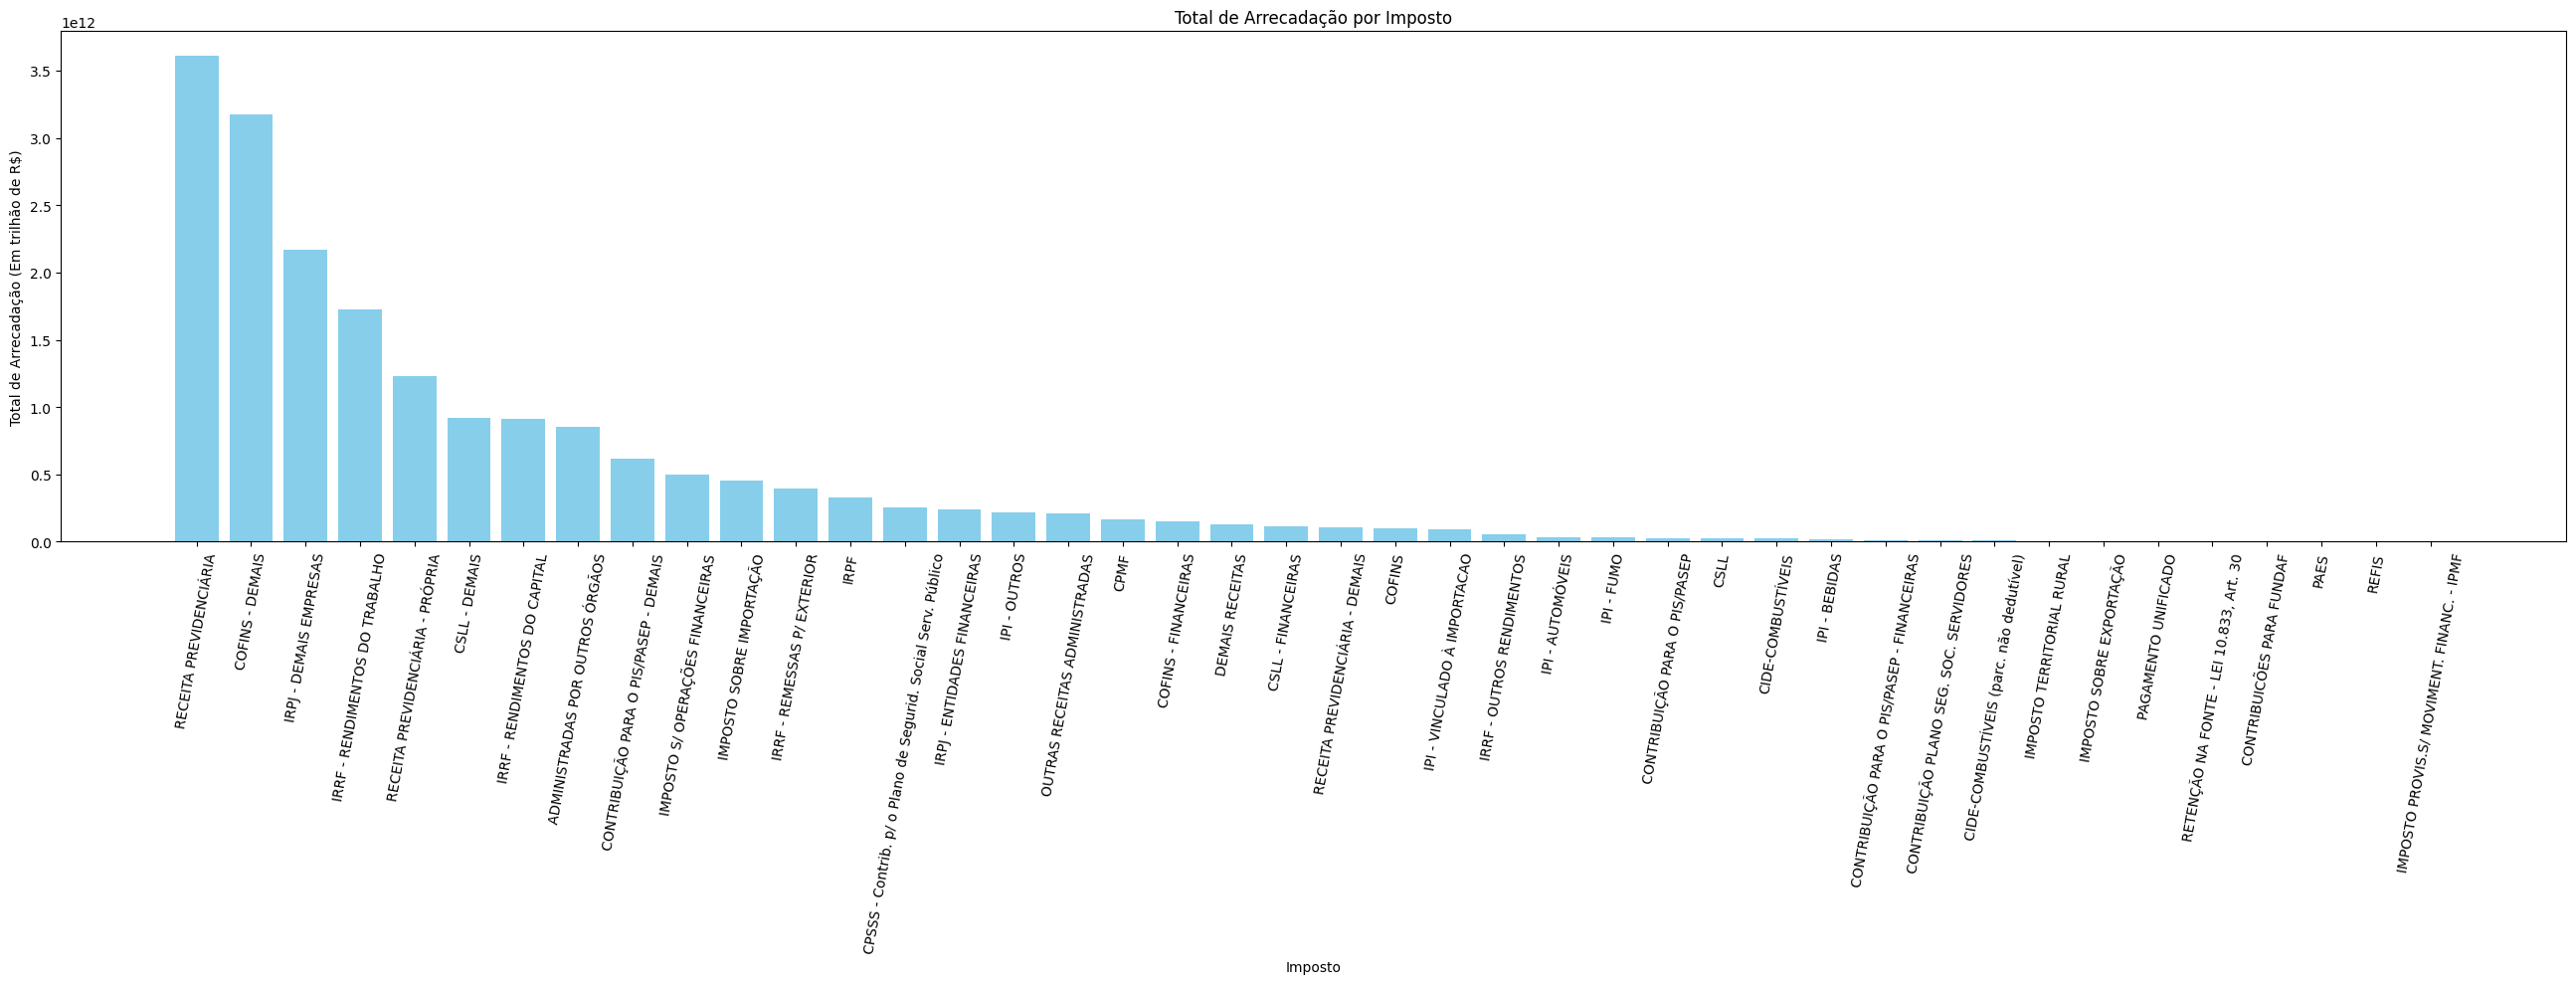

In [ ]:
# Criando o gráfico por tipo de imposto
plt.figure(figsize=(26, 10))
plt.bar(totais_df['Tipo_Imposto'], totais_df['Total_Arrecadado'], color='skyblue')
plt.title('Total de Arrecadação por Imposto')
plt.xlabel('Imposto')
plt.ylabel('Total de Arrecadação (Em trilhão de R$)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [ ]:
# Agrupando por ano e somando os valores
tabela_por_ano = df.groupby('Ano')['Total_Impostos'].sum().reset_index()

# Calculando o total geral da base
total_geral = tabela_por_ano['Total_Impostos'].sum()

# Criando a coluna de % da base por ano
tabela_por_ano['%_Ano'] = (tabela_por_ano['Total_Impostos'] / total_geral) * 100

# Criando a coluna de % acumulado
tabela_por_ano['%_Acumulado'] = tabela_por_ano['%_Ano'].cumsum()

# Formatando os valores para facilitar a leitura
tabela_por_ano['Total_Impostos'] = tabela_por_ano['Total_Impostos'].apply(lambda x: f'R$ {x:,.2f}')
tabela_por_ano['%_Ano'] = tabela_por_ano['%_Ano'].apply(lambda x: f'{x:.2f}%')
tabela_por_ano['%_Acumulado'] = tabela_por_ano['%_Acumulado'].apply(lambda x: f'{x:.2f}%')

# Exibindo a tabela
tabela_por_ano



,Ano,Total_Impostos,%_Ano,%_Acumulado
0,2000,"R$ 166,076,240,429.00",0.88%,0.88%
1,2001,"R$ 55,562,934,594.00",0.29%,1.17%
2,2002,"R$ 60,274.00",0.00%,1.17%
3,2003,"R$ 239,658,993,495.00",1.26%,2.43%
4,2004,"R$ 321,869,405,937.00",1.70%,4.13%
5,2005,"R$ 376,730,284,143.00",1.99%,6.12%
6,2006,"R$ 392,557,570,666.00",2.07%,8.19%
7,2007,"R$ 448,884,202,612.00",2.37%,10.55%
8,2008,"R$ 230,510,331,887.00",1.22%,11.77%
9,2009,"R$ 220,866,183,203.00",1.16%,12.93%


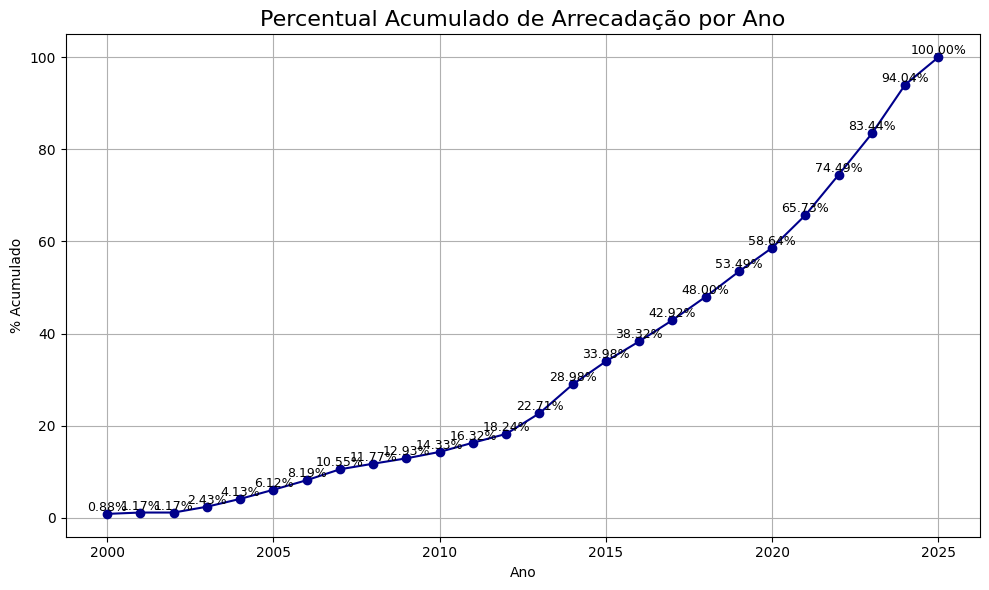

In [ ]:
# Recalculando % acumulado como número (como estava como string por conta do % estava dando erro)
tabela_por_ano_a = df.groupby('Ano')['Total_Impostos'].sum().reset_index()
total_geral = tabela_por_ano_a['Total_Impostos'].sum()
tabela_por_ano_a['%_Ano'] = (tabela_por_ano_a['Total_Impostos'] / total_geral) * 100
tabela_por_ano_a['%_Acumulado'] = tabela_por_ano_a['%_Ano'].cumsum()

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tabela_por_ano_a['Ano'], tabela_por_ano_a['%_Acumulado'], marker='o', color='darkblue')
plt.title('Percentual Acumulado de Arrecadação por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('% Acumulado')
plt.grid(True)

# Adicionando os valores em cima dos pontos (agora com número formatado corretamente)
for i in range(len(tabela_por_ano_a)):
    valor = tabela_por_ano_a['%_Acumulado'][i]
    plt.text(tabela_por_ano_a['Ano'][i], valor, f"{valor:.2f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### 🔍 Análise por Impostos

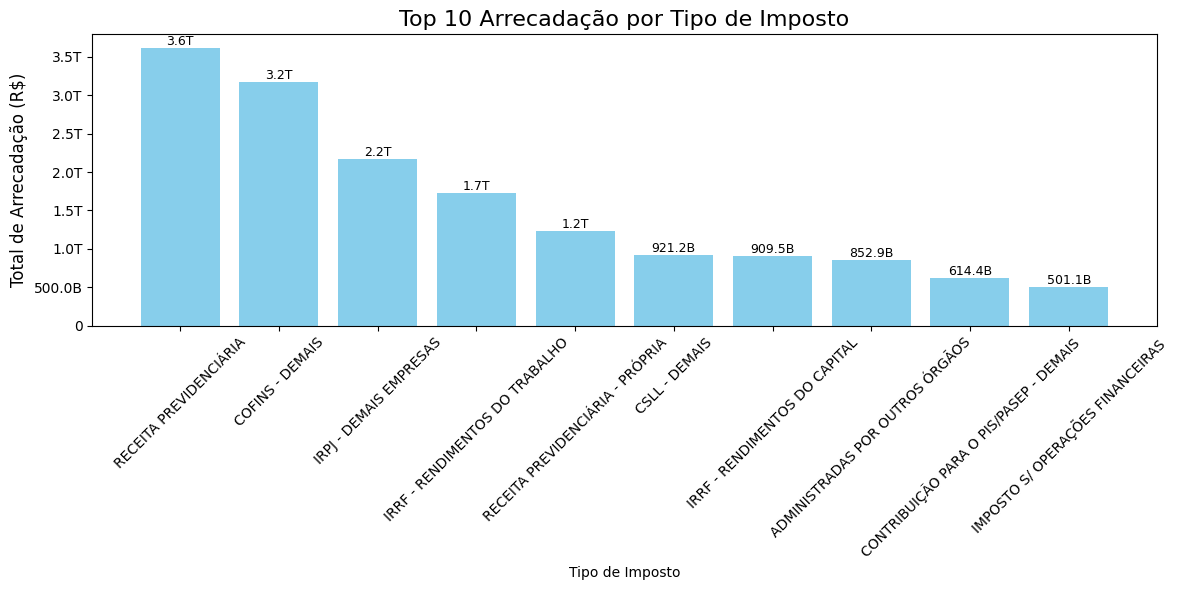

In [ ]:
# Ordenando do maior para o menor para plotar um TOP10
top10_df = totais_df.sort_values(by='Total_Arrecadado', ascending=False).head(10)


plt.figure(figsize=(12, 6))
bars = plt.bar(top10_df['Tipo_Imposto'], top10_df['Total_Arrecadado'], color='skyblue')
plt.title('Top 10 Arrecadação por Tipo de Imposto', fontsize=16)
plt.xlabel('Tipo de Imposto')
plt.ylabel('Total de Arrecadação (R$)', fontsize=12)
plt.xticks(rotation=45)
formatar_valores(plt.gca())


# Adicionando os valores em cima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             formatar_numero(height),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### 📊 Análise: TOP 10

No gráfico acima temos como maior arrecadação, a Receita Previdenciária com 3.6 trilhões de reais. Nessa base de dados essa coluna representa o total arrecadado com contribuições previdenciárias - ou seja, aquelas destinadas ao financiamento da Previdência Social - sem separar se a receita é:

* Própria: arrecadação vinculada ao próprio órgão ou entidade (por exemplo, contribuições de servidores de um regime próprio).

* Demais: arrecadação de outros entes ou regimes.

Em seguida temos o COFINS - DEMAIS com 3.2 trilhões de reais, que representa o valor arrecadado referente de entidades que não são financeiras. O COFINS (Contribuição para o Financiamento da Seguridade Social, é uma contribuição federal que incide sobre a receita bruta das transações, destinada a financiar a seguridade social (saúde, previdência e assistência social)).

Em terceiro lugar observamos o IRPJ - DEMAIS EMPRESAS, com 2.2 trilhões de reais que representa o Imposto sobre a Renda da Pessoa Jurídica de empresas que não são entidades financeiras.

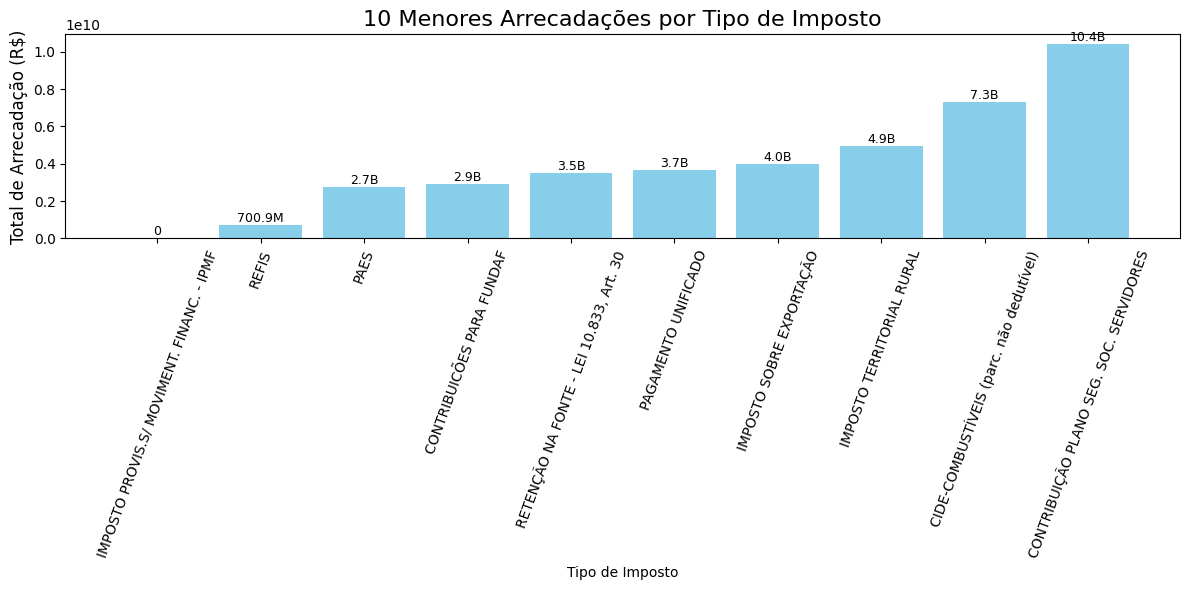

In [ ]:
# Ordenando do maior para o menor e pegando os 10 últimos valores
tail10_df = totais_df.sort_values(by='Total_Arrecadado', ascending=False).tail(10)

# Reordenando para o gráfico ficar crescente
tail10_df = tail10_df.sort_values(by='Total_Arrecadado', ascending=True)


plt.figure(figsize=(12, 6))
bars = plt.bar(tail10_df['Tipo_Imposto'], tail10_df['Total_Arrecadado'], color='skyblue')
plt.title('10 Menores Arrecadações por Tipo de Imposto', fontsize=16)
plt.xlabel('Tipo de Imposto')
plt.ylabel('Total de Arrecadação (R$)', fontsize=12)
plt.xticks(rotation=70)

# Adicionando os valores em cima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             formatar_numero(height),
             ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()

In [ ]:
#Filtrando os valores da coluna IMPOSTO PROVIS.S/ MOVIMENT. FINANC. - IPMF
coluna_ipmf = df['IMPOSTO PROVIS.S/ MOVIMENT. FINANC. - IPMF']
coluna_ipmf


,IMPOSTO PROVIS.S/ MOVIMENT. FINANC. - IPMF
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
8257,NaN
8258,NaN
8259,NaN
8260,NaN


In [ ]:
valores_ipmf = df['IMPOSTO PROVIS.S/ MOVIMENT. FINANC. - IPMF'].sum()
valores_ipmf

np.float64(0.0)

## 📊 Análise Geral:

#### IMPOSTO PROVISÓRIO S/ MOVIMENT. FINANC. - IPMF
O menor valor da base é na verdade referente a um imposto que não teve recadação. A soma dos valores é zero. No dicionário de metadados temos que IMPOSTO PROVISÓRIO S/ MOVIMENT. FINANC. - IPMF
Imposto Provisório sobre Movimentação Financeira tem informação
zerada de janeiro de 2000 a dezembro de 2001. Após esse período não
aparece mais. Aprofundando no tema, entendemos que foi um tributo criado em 1993, durante o governo de Itamar Franco, com o então ministro da Fazenda Fernando Henrique Cardoso. Ele entrou em vigor em 1º de janeiro de 1994 e durou até 31 de dezembro de 1994. Isso explica os valores zerados, apesar da permanênicia da coluna na base de dados. A alíquota era de 0,25% sobre cada movimentação financeira e o imposto era de caráter provisório. Após a extinção foi criado a CPMF (Contribuição Provisória sobre Movimentação Financeira), que começou a valer em 1997. A CPMF teve uma alíquota inicial de 0,20%, depois variou até 0,38%, e foi extinta em 20072. Diferente do IPMF, a CPMF tinha destinação específica: saúde pública, previdência social e combate à pobreza.


#### REFIS
Como segunda menor arrecadação, temos os valores referentes a REFIS. O REFIS (Programa de Recuperação Fiscal) foi uma iniciativa do governo federal criada para permitir que empresas regularizassem seus débitos tributários com condições especiais de parcelamento e redução de encargos. Os dados representa mvalores pagos ou negociados dentro desse programa.

#### PAES

Como terceira menor arrecadação temos o PAES (Parcelamento Especial), que é semelhante ao REFIS. Foi um programa Criado para permitir que empresas regularizassem débitos tributários vencidos até 28 de fevereiro de 2003.
Ele abrangia tributos administrados pela Receita Federal e pela Procuradoria-Geral da Fazenda Nacional. Permitia parcelamento em até 180 meses (15 anos), com condições especiais de pagamento. Foi uma resposta à crise econômica da época, buscando aumentar a arrecadação e reduzir a inadimplência.

In [ ]:
# Gráfico de 3 impostos mais relevantes
def plot_imposto_por_ano_interativo(df, nome_imposto, largura=800, altura=500):
    dados_ano = df.groupby('Ano')[nome_imposto].sum().reset_index()
    fig = px.line(
        dados_ano,
        x='Ano',
        y=nome_imposto,
        markers=True,
        title=f'Arrecadação Anual - {nome_imposto}',
        labels={nome_imposto: 'Total de Arrecadação (R$)', 'Ano': 'Ano'},
        template='plotly_white',
        width=largura,
        height=altura
    )
    fig.update_traces(
        text=[f'{v/1e9:.1f}B' for v in dados_ano[nome_imposto]],
        textposition='top center',
        mode='lines+markers+text'
    )
    fig.show()

# Escolhendo apenas os 3 impostos com maiores arrecadações
impostos_principais = [
    'RECEITA PREVIDENCIÁRIA',
    'COFINS - DEMAIS',
    'IRPJ - DEMAIS EMPRESAS'
]

# Gráfico
for imposto in impostos_principais:
    plot_imposto_por_ano_interativo(df, imposto, largura=1000, altura=500)

## 📊 Análise Geral:
### RECEITA PREVIDENCIÁRIA
De acordo com as análises, temos a Receita Previdenciária como maior valor de arrecadação. Essa rubrica refere-se ao total arrecadado com contribuições previdenciárias, sem distinguir se a origem é própria (do ente público) ou de terceiros (como servidores ou contratados). Ela aparece nos demonstrativos a partir de janeiro de 2017 e volta a ser registrada com regularidade a partir de abril do mesmo ano. De maneira geral, representa valores vinculados ao INSS. O dicionário de metadados não deixa claro, mas possivelmente é composta por contribuições patronais (pagas pelo empregador), contribuição dos funcionários (descontada em folha), compensações como salário-maternidade e salário-família e receitas de restituições e créditos previdenciários.
É um consolidado daquilo que o ente público recolhe para a previdência.

### COFINS - DEMAIS
Como segunda maior arrecadação, temos a coluna de COFINS – DEMAIS, que representa a arrecadação da Contribuição para o Financiamento da Seguridade Social (COFINS) feita por empresas que não são entidades financeiras e nem se enquadram em regimes especiais, como o Simples Nacional. Ela aparece na base a partir de janeiro de 2004, justamente após mudanças trazidas pela Lei nº 10.833/2003, que instituiu o regime não cumulativo da COFINS.
O COFINS é um imposto federal que incide sobre o faturamento das empresas. Existem dois regimes de incidência de tributação:
* Cumulativo, que é seguido por empresas do Lucro Presumido ou Arbitrado, onde a base de cálculo é a receita operacional bruta da pessoa jurídica, sem deduções em relação a custos, despesas e encargos, com alíquota de 3%.
* Já no regime não-cumulativo, que ocorre nas empresas tributadas pelo Lucro Real, é permitido o desconto de créditos apurados com base em custos, despesas e encargos da pessoa jurídica, e a alíquota é de 7,6%. ( ou seja, você recolhe quando vende, mas toma crédito quando compra para operacionalizar)

### IRPJ - DEMAIS
Como terceira maior fonte arrecadatória, temos o  IRPJ – DEMAIS EMPRESAS, que representa a arrecadação do Imposto sobre a Renda da Pessoa Jurídica (IRPJ) de empresas que não instituições financeiras. No sistema tributário brasileiro, existem duas grandes formas de arrecadação de IRPJ. Pelo Lucro Real, com alíquota de 15% sobre o lucro líquido + adicional de 10% acima de 20 mil reais por mês, e o Lucro Presumido, onde se presume uma margem de lucro baseada na receita bruta x alíquota de presunção ( de acordo com o setor e atividade da entidade e se aplica uma alíquota de 1,6% a 32%) e sobre essa margem aplica a alíquota de 15%.